# Colonies de fourmis

In [251]:
from networkx.drawing.nx_pylab import draw
import numpy as np
import networkx as nx
import random as rn
from numpy.random import choice as np_choice
from networkx.algorithms.shortest_paths.generic import shortest_path as shortest_path_d
import matplotlib.pyplot as plt


In [252]:
def antcolony(distances,n_fourmies,iter, alpha, beta, rho, Q):
    pheromones = np.ones(distances.shape) / len(distances)
    meilleur_chemin_global = {"chemin" : None, "longueur" : np.inf}
    for t in range(iter):
    #generer les chemins
      chemins = np.array([])
      longueurs = np.array([])

      for i in range(n_fourmies):
        #generer un chemin pour la fourmie i
        chemin = []
        longueur = np.array([])
        deja_visite = np.array([],dtype = np.int)
        deja_visite = np.append(deja_visite,0) #notre noeud d entree est toujours 0
        dernier = 0
        prochain = 0             
        while prochain != len(distances)-1 :   # notre noeud de sortie est toujours le dernier element du graph oriente
            probabilites = np.copy(pheromones[dernier])
            for j in deja_visite : 
              probabilites[j] = 0
           
            probabilites = probabilites ** alpha * (( 1.0 / distances[dernier]) ** beta) 
            probabilites /= probabilites.sum()
            prochain = np.random.choice(range(len(distances)), p=probabilites, size =1)[0]
            chemin.append((dernier, prochain))
            
            dernier = prochain
            deja_visite = np.append(deja_visite,prochain)
            
        longueur = np.array([distances[a] for a in chemin]).sum()
        longueurs = np.append(longueurs, longueur)     
        chemins = np.append(chemins, [{"chemin" : chemin,"longueur" : longueur}])
     
      
      #tirer le meilleur chemin
      if min(longueurs) < meilleur_chemin_global["longueur"]:
            meilleur_chemin_global["longueur"] = min(longueurs)
            idx = np.argmin(longueurs)
            meilleur_chemin_global["chemin"] = chemins[idx]["chemin"]
      

      #mettre a jour le phermone
      pheromones = rho * pheromones
      for l in range(len(chemins)):
          chemin = chemins[l]["chemin"]
          for k in range(len(chemin)):
            idx = chemin[k]
            pheromones[idx] += Q/chemins[l]["longueur"]

    return meilleur_chemin_global
   
    
    

#### Création d'un graph dirigé de 20 noeuds avec des distances/poids/couts entre deux noeuds variants entre 0 et 1000.

meilleur_chemin: {'chemin': [(0, 12), (12, 16), (16, 19)], 'longueur': 122.0}

meilleur_chemin avec Dijkstra is : [0, 12, 16, 19]
(0, 12) {'weight': 6}
(12, 16) {'weight': 92}
(16, 19) {'weight': 24}


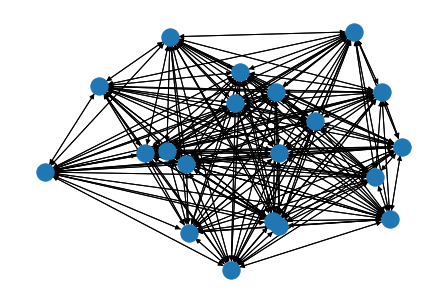

In [253]:

G0 = nx.complete_graph(20, nx.DiGraph())

for (u, v) in G0.edges():
          G0.edges[u,v]['weight'] = np.random.randint(1,1000)

   
nx.draw(G0)
G = nx.convert_matrix.to_numpy_array(G0)

for i in range(len(G)):
    G[i][i] = np.inf

rho = np.random.rand()
meilleur_chemin = antcolony(G, 100, 100, 1, 1, rho, 10)
print (f"meilleur_chemin: {meilleur_chemin}")

#Comparaison 
meilleur_chemin_dijkstra = shortest_path_d(G0,0,19,'weight')
print(f"\nmeilleur_chemin avec Dijkstra is : {meilleur_chemin_dijkstra}")
pathGraph = nx.path_graph(meilleur_chemin_dijkstra)  # does not pass edges attributes

#StackOverFlow https://stackoverflow.com/questions/57683321/edge-attributes-of-shortest-path-using-networkx
for ea in pathGraph.edges():
    print(ea, G0.edges[ea[0], ea[1]])


### REFERENCES :

https://www.sciencedirect.com/science/article/pii/S1002007108002736#fig2
https://github.com/Akavall/AntColonyOptimization/blob/master/ant_colony.py